In [46]:
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator, DateFormatter 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy import array
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import LSTM
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import missingno as msno
import datetime



In [47]:
pd.set_option('display.max_columns',1000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth',1000)

df = pd.read_csv('c:/Users/ThinkPad/Desktop/Data_clean/rohdaten_v3.csv',float_precision='round_trip')

df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp') 
#d1=d[d['timestamp'].str.contains((r'2020-05-14'))]

d1=df['2020-05-01':'2020-06-15']

d1.to_csv('05.csv')
print(d1)

                     vehiclecount  node  co_2_esp  co_op1  co_op2  counter_arduino  counter_esp  ir_brightness  lrvehiclecount  no_2_op1  no_2_op2  o_3_op1  o_3_op2        pm1      pm10     pm2_5  rlvehiclecount  tvoc_esp  uv_index     v_in  brightness  brightness_esp  humidity_bme280  humidity_esp  humidity_opc  peek_to_peek  preassure_bme280  preassure_esp  rainlasthour  rainticks  temperature_bme280  temperature_esp  temperature_opc  volumeindex  winddir  windspeed  vehiclecountdiff   timediff  trafficperminute
timestamp                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

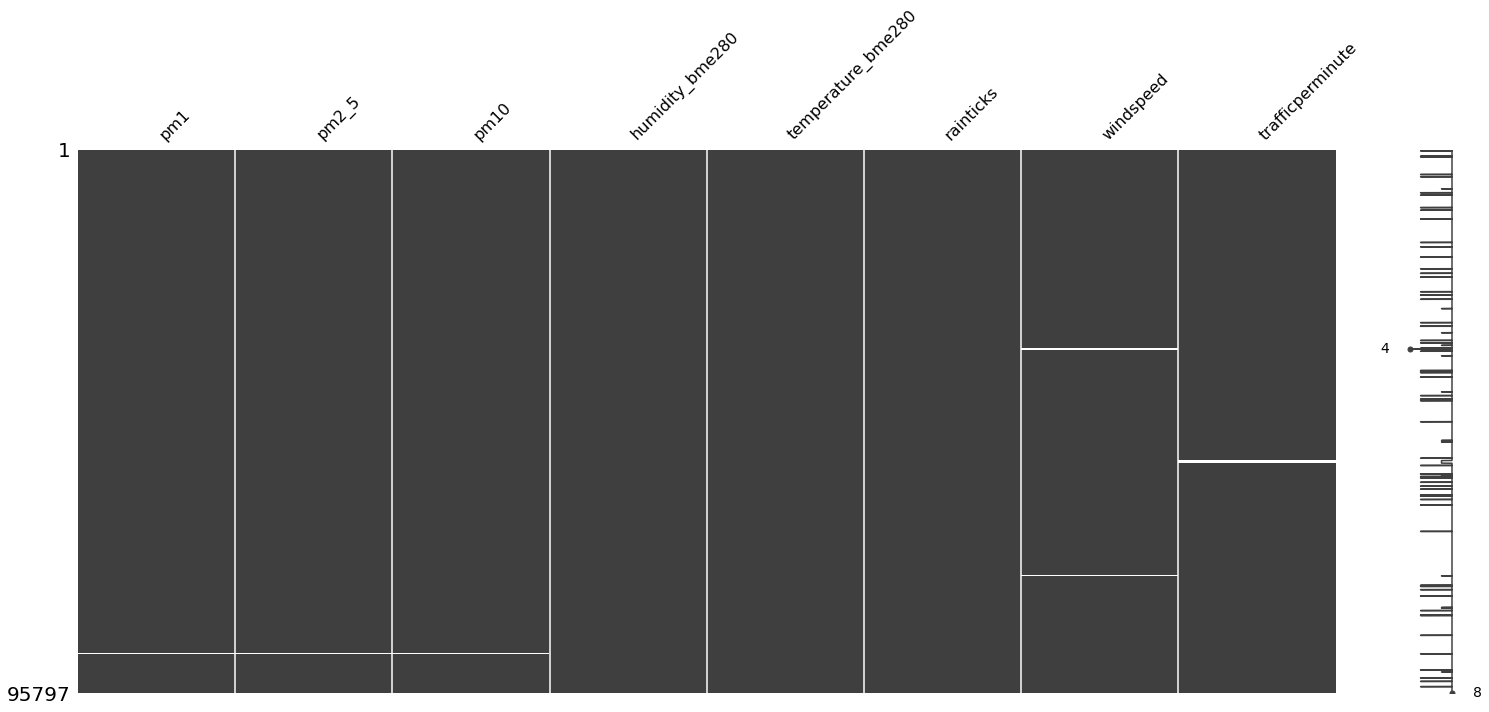

,pm1,pm2_5,pm10,humidity_bme280,temperature_bme280,rainticks,windspeed,trafficperminute
count,95661.000000,95661.000000,95661.000000,95786.000000,95797.000000,95797.000000,9.554100e+04,95320.000000
mean,2.096426,3.653637,9.234845,65.249418,15.695438,0.450172,2.305871e+34,5.288572
std,2.148689,2.839090,10.761712,24.272137,5.075163,2.441706,2.058560e+36,6.105113
min,0.101739,0.102992,0.102992,19.739300,2.470000,0.000000,0.000000e+00,0.000000
25%,0.906321,2.034770,3.390240,43.244350,12.010000,0.000000,5.904150e-01,0.000000
50%,1.416170,2.984130,6.385020,64.005400,15.510000,0.000000,1.375750e+00,4.000000
75%,2.374780,4.454850,12.168300,87.305200,19.080000,0.000000,2.854490e+00,8.000000
max,43.501900,137.927000,817.147000,100.000000,29.530000,20.675600,2.952950e+38,150.000000


In [48]:
import missingno as msno
import datetime


df=d1[["pm1","pm2_5","pm10","humidity_bme280","temperature_bme280","rainticks","windspeed","trafficperminute"]]
#df['timestamp'] = pd.to_datetime(df['timestamp'])
#df = df.set_index('timestamp') 
msno.matrix(df)
plt.show()
df.describe()

In [49]:
df = df[df["windspeed"]<=100]
df.describe()

,pm1,pm2_5,pm10,humidity_bme280,temperature_bme280,rainticks,windspeed,trafficperminute
count,91142.000000,91142.000000,91142.000000,91251.000000,91262.000000,91262.000000,91262.000000,90889.000000
mean,2.100159,3.661421,9.199051,65.098617,15.748168,0.435170,2.456387,5.480798
std,2.173356,2.877907,10.869024,24.430460,5.129030,2.376596,5.482010,6.163334
min,0.101739,0.102992,0.102992,19.739300,2.470000,0.000000,0.000000,0.000000
25%,0.899527,2.015223,3.343800,42.633300,12.010000,0.000000,0.570899,0.000000
50%,1.398580,2.972160,6.343710,64.032200,15.580000,0.000000,1.294625,4.000000
75%,2.378200,4.478413,12.123200,87.345700,19.210000,0.000000,2.553860,8.000000
max,43.501900,137.927000,817.147000,100.000000,29.530000,20.675600,99.793100,150.000000


In [50]:
#DF=df.set_index(df["timestamp"])
df.index=pd.to_datetime(df.index,format='%Y-%m-%d %H:%M:%S')

mean_1h=df.resample('60min').mean()
mean_1h.isnull().sum()

pm1                   33
pm2_5                 33
pm10                  33
humidity_bme280       33
temperature_bme280    33
rainticks             33
windspeed             33
trafficperminute      36
dtype: int64

In [51]:
# dropping all the rows with NaN values
df = mean_1h.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 799 entries, 2020-05-06 12:00:00 to 2020-06-10 06:00:00
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pm1                 799 non-null    float64
 1   pm2_5               799 non-null    float64
 2   pm10                799 non-null    float64
 3   humidity_bme280     799 non-null    float64
 4   temperature_bme280  799 non-null    float64
 5   rainticks           799 non-null    float64
 6   windspeed           799 non-null    float64
 7   trafficperminute    799 non-null    float64
dtypes: float64(8)
memory usage: 56.2 KB


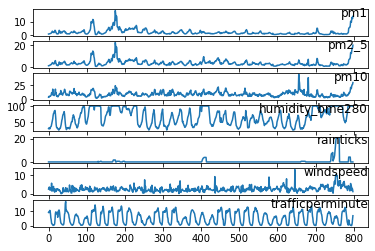

In [59]:
from matplotlib import pyplot
values = df.values
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(df.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [79]:
from pandas import concat
from pandas import DataFrame
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg


# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  var7(t-1)  var8(t-1)  var9(t-1)   var8(t)   var9(t)
1   0.026416   0.031137   0.051245   0.063180   0.506328        0.0   0.197503   0.549571   0.028109  0.533104  0.033653
2   0.028109   0.036230   0.079346   0.091010   0.472786        0.0   0.225723   0.533104   0.033653  0.557569  0.036187
3   0.033653   0.040963   0.059447   0.099834   0.492283        0.0   0.280694   0.557569   0.036187  0.628531  0.043481
4   0.036187   0.044275   0.087651   0.049043   0.578771        0.0   0.164118   0.628531   0.043481  0.623495  0.052988
5   0.043481   0.059762   0.081795   0.077865   0.506773        0.0   0.226777   0.623495   0.052988  0.494414  0.055482
ERROR! Session/line number was not unique in database. History logging moved to new session 135


In [90]:
# split into train and test sets
values = reframed.values
n_train_hours = 639
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(639, 1, 10) (639,) (158, 1, 10) (158,)
ERROR! Session/line number was not unique in database. History logging moved to new session 153


Train on 639 samples, validate on 158 samples
Epoch 1/200
639/639 - 2s - loss: 0.0923 - val_loss: 0.0681
Epoch 2/200
639/639 - 0s - loss: 0.0662 - val_loss: 0.0907
Epoch 3/200
639/639 - 0s - loss: 0.0611 - val_loss: 0.0864
Epoch 4/200
639/639 - 0s - loss: 0.0552 - val_loss: 0.0746
Epoch 5/200
639/639 - 0s - loss: 0.0528 - val_loss: 0.0685
Epoch 6/200
639/639 - 0s - loss: 0.0517 - val_loss: 0.0694
Epoch 7/200
639/639 - 0s - loss: 0.0496 - val_loss: 0.0722
Epoch 8/200
639/639 - 0s - loss: 0.0472 - val_loss: 0.0714
Epoch 9/200
639/639 - 0s - loss: 0.0455 - val_loss: 0.0695
Epoch 10/200
639/639 - 0s - loss: 0.0444 - val_loss: 0.0683
Epoch 11/200
639/639 - 0s - loss: 0.0435 - val_loss: 0.0680
Epoch 12/200
639/639 - 0s - loss: 0.0424 - val_loss: 0.0670
Epoch 13/200
639/639 - 0s - loss: 0.0412 - val_loss: 0.0648
Epoch 14/200
639/639 - 0s - loss: 0.0404 - val_loss: 0.0627
Epoch 15/200
639/639 - 0s - loss: 0.0397 - val_loss: 0.0608
Epoch 16/200
639/639 - 0s - loss: 0.0389 - val_loss: 0.0585
Epo

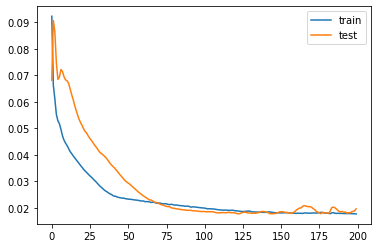

In [91]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=200, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()



In [93]:
# make a prediction
yhat = model.predict(test_X)
for i in range(5):
    print(yhat[i])



ERROR! Session/line number was not unique in database. History logging moved to new session 157
[0.01250979]
[0.01557213]
[0.00981847]
[0.01663562]
[0.01951886]


ERROR! Session/line number was not unique in database. History logging moved to new session 159


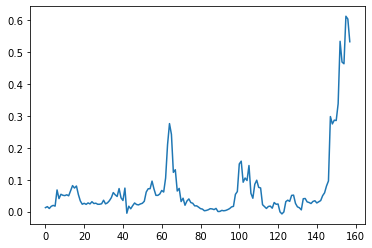

In [94]:
plt.plot(yhat)


In [95]:
mse = mean_squared_error(test_y, yhat)
print('MSE: %.5f' % mse)

MSE: 0.00159
ERROR! Session/line number was not unique in database. History logging moved to new session 161
